In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
df = pd.read_csv('./FAO.csv', encoding='latin1')

In [3]:
df.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [4]:
df['Element'].unique()

array(['Food', 'Feed'], dtype=object)

In [5]:
# Extracting all the year data
year_list = df.iloc[:,df.columns.str.startswith('Y')].columns

In [6]:
# Extracting the last ten years
year_list = year_list[len(year_list)-10:len(year_list)]

In [7]:
# Getting a general idea of Food and Feed of all Countries yearwise
df_new = df.pivot_table(values=year_list, columns='Element',index=['Area'], aggfunc='sum')

In [8]:
df_new.head()

Y2004            Y2005             Y2006           \
Element                Feed     Food    Feed     Food     Feed     Food   
Area                                                                      
Afghanistan           704.0  15838.0  1184.0  16474.0   1342.0  16975.0   
Albania               990.0   5647.0   994.0   5725.0   1047.0   5864.0   
Algeria              4575.0  44044.0  4401.0  45161.0   4599.0  46468.0   
Angola               9622.0  15919.0  9814.0  16882.0  10004.0  18243.0   
Antigua and Barbuda     0.0     92.0     2.0    113.0      2.0    108.0   

                       Y2007             Y2008             Y2009           \
Element                 Feed     Food     Feed     Food     Feed     Food   
Area                                                                        
Afghanistan           1392.0  17856.0   1294.0  18087.0   1616.0  19045.0   
Albania                959.0   5785.0   1075.0   6093.0   1134.0   6182.0   
Algeria               4252.0  45681.0   3436.0  47480.0   4839.0  52666.0   
Angola               10112.0  19765.0  10274.0  21779.0  12520.0  24465.0   
Antigua and Barbuda      0.0    122.0      0.0    115.0      0.0    114.0   

                       Y2010             Y2011           Y2012         Y2013  \
Element                 Feed     Food     Feed     Food   Feed   Food   Feed   
Area                                                                           
Afghanistan           1388.0  19642.0   1192.0  19908.0   1522  21184   1536   
Albania               1334.0   6573.0   1334.0   6780.0   1312   6909   1319   
Algeria               5804.0  54267.0   7477.0  58375.0   8549  60816   8706   
Angola               12408.0  25992.0  13118.0  27455.0  10096  27968  18518   
Antigua and Barbuda      0.0    115.0      0.0    118.0      0    113      0   

                            
Element               Food  
Area                        
Afghanistan          21471  
Albania               6952  
Algeria              63455  
Angola               30121  
Antigua and Barbuda    119

In [9]:
# Applying transpose to the above data to get it ready for work
df_foody = df_new.T

In [10]:
df_foody.head()

Area           Afghanistan  Albania  Algeria   Angola  Antigua and Barbuda  \
      Element                                                                
Y2004 Feed           704.0    990.0   4575.0   9622.0                  0.0   
      Food         15838.0   5647.0  44044.0  15919.0                 92.0   
Y2005 Feed          1184.0    994.0   4401.0   9814.0                  2.0   
      Food         16474.0   5725.0  45161.0  16882.0                113.0   
Y2006 Feed          1342.0   1047.0   4599.0  10004.0                  2.0   

Area           Argentina  Armenia  Australia  Austria  Azerbaijan    ...     \
      Element                                                        ...      
Y2004 Feed       10532.0   1216.0    21884.0   7903.0      2329.0    ...      
      Food       54026.0   4299.0    36122.0  16562.0     11205.0    ...      
Y2005 Feed       14735.0   1092.0    25832.0   7658.0      2242.0    ...      
      Food       57581.0   4900.0    37879.0  16808.0     12722.0    ...      
Y2006 Feed       14030.0    962.0    23662.0   7291.0      2203.0    ...      

Area           United Republic of Tanzania  United States of America  Uruguay  \
      Element                                                                   
Y2004 Feed                          2622.0                  362504.0   1462.0   
      Food                         39382.0                  634991.0   4664.0   
Y2005 Feed                          3269.0                  353682.0   1390.0   
      Food                         41043.0                  628442.0   4847.0   
Y2006 Feed                          3849.0                  318577.0   1364.0   

Area           Uzbekistan  Vanuatu  Venezuela (Bolivarian Republic of)  \
      Element                                                            
Y2004 Feed         4503.0     10.0                              2911.0   
      Food        29595.0    284.0                             30844.0   
Y2005 Feed         6945.0     10.0                              1570.0   
      Food        30899.0    289.0                             31853.0   
Y2006 Feed         7898.0     12.0                              2580.0   

Area           Viet Nam    Yemen  Zambia  Zimbabwe  
      Element                                       
Y2004 Feed      18738.0    127.0   102.0     274.0  
      Food      76724.0  13334.0  7668.0    7944.0  
Y2005 Feed      20009.0    159.0    70.0     251.0  
      Food      78386.0  13898.0  7877.0    7819.0  
Y2006 Feed      21500.0    219.0    89.0     292.0  

[5 rows x 174 columns]

In [11]:
# Extracting only food produced
df_food = df_foody.xs('Food', level=1, axis=0)

In [12]:
df_food.head()

Area,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
Y2004,15838.0,5647.0,44044.0,15919.0,92.0,54026.0,4299.0,36122.0,16562.0,11205.0,...,39382.0,634991.0,4664.0,29595.0,284.0,30844.0,76724.0,13334.0,7668.0,7944.0
Y2005,16474.0,5725.0,45161.0,16882.0,113.0,57581.0,4900.0,37879.0,16808.0,12722.0,...,41043.0,628442.0,4847.0,30899.0,289.0,31853.0,78386.0,13898.0,7877.0,7819.0
Y2006,16975.0,5864.0,46468.0,18243.0,108.0,58116.0,5266.0,38902.0,16739.0,13536.0,...,43813.0,630314.0,4785.0,33868.0,302.0,32779.0,78283.0,14633.0,8188.0,8289.0
Y2007,17856.0,5785.0,45681.0,19765.0,122.0,59078.0,5425.0,40055.0,17104.0,13803.0,...,45628.0,636954.0,5209.0,35370.0,321.0,35988.0,82369.0,15655.0,8113.0,8315.0
Y2008,18087.0,6093.0,47480.0,21779.0,115.0,61350.0,5537.0,40928.0,17266.0,13848.0,...,44395.0,627922.0,5069.0,37430.0,331.0,39117.0,84200.0,15985.0,8518.0,8243.0


In [13]:
# Finding the Top 5 food producer countries over the 10 years
df_food_total = df_food.sum(axis=0).sort_values(ascending=False).head()

In [14]:
df_food_total

Area
China, mainland             22090365.0
India                       10774362.0
United States of America     6327371.0
Brazil                       2925111.0
Russian Federation           2491508.0
dtype: float64

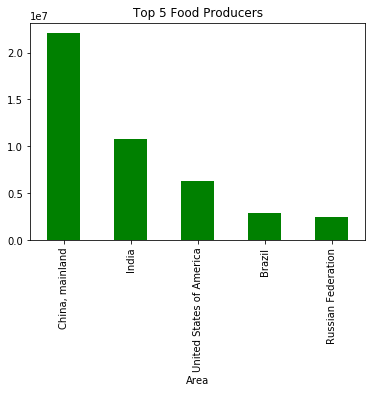

In [15]:
df_food_total.plot(kind='bar', title='Top 5 Food Producers', color='green')

In [16]:
df_food_total.index

Index(['China, mainland', 'India', 'United States of America', 'Brazil',
       'Russian Federation'],
      dtype='object', name='Area')

In [17]:
df_food.index

Index(['Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011',
       'Y2012', 'Y2013'],
      dtype='object')

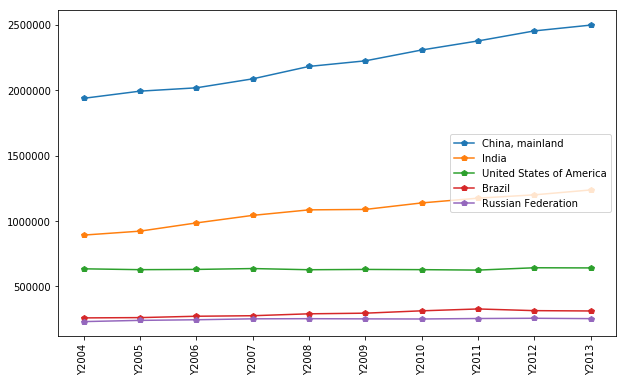

In [18]:
# Visualising the food produced by top 5 countries over the 10 years
plt.figure(figsize = (10,6))
for i in df_food_total.index:
    year = df_food[i]
    plt.plot(year, marker='p')
    plt.xticks(df_food.index, rotation='vertical')
    plt.legend(loc='right')

In [19]:
# extracting the food consumers
df_feed =  df_new.T.xs('Feed',level=1, axis=0)

In [20]:
df_feed.head()

Area,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
Y2004,704.0,990.0,4575.0,9622.0,0.0,10532.0,1216.0,21884.0,7903.0,2329.0,...,2622.0,362504.0,1462.0,4503.0,10.0,2911.0,18738.0,127.0,102.0,274.0
Y2005,1184.0,994.0,4401.0,9814.0,2.0,14735.0,1092.0,25832.0,7658.0,2242.0,...,3269.0,353682.0,1390.0,6945.0,10.0,1570.0,20009.0,159.0,70.0,251.0
Y2006,1342.0,1047.0,4599.0,10004.0,2.0,14030.0,962.0,23662.0,7291.0,2203.0,...,3849.0,318577.0,1364.0,7898.0,12.0,2580.0,21500.0,219.0,89.0,292.0
Y2007,1392.0,959.0,4252.0,10112.0,0.0,15070.0,1328.0,22582.0,7327.0,2941.0,...,3661.0,328510.0,1748.0,10017.0,10.0,4006.0,21892.0,409.0,76.0,230.0
Y2008,1294.0,1075.0,3436.0,10274.0,0.0,14589.0,1421.0,23510.0,8001.0,3115.0,...,4274.0,308173.0,1982.0,10990.0,12.0,4240.0,20362.0,216.0,94.0,249.0


In [21]:
# Top 5 food consumers
df_feed_total = df_feed.sum(axis=0).sort_values(ascending=False).head()

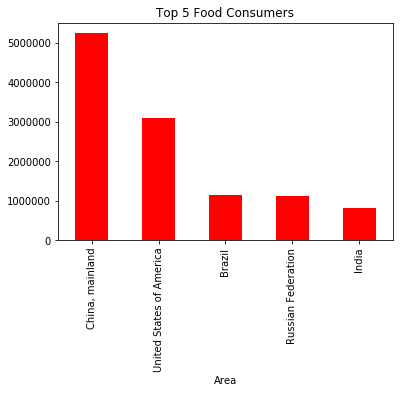

In [22]:
df_feed_total.plot(kind='bar', title="Top 5 Food Consumers", color='red')

In [23]:
df_feed_total.index

Index(['China, mainland', 'United States of America', 'Brazil',
       'Russian Federation', 'India'],
      dtype='object', name='Area')

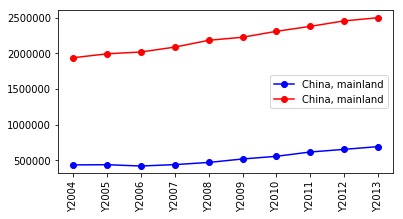

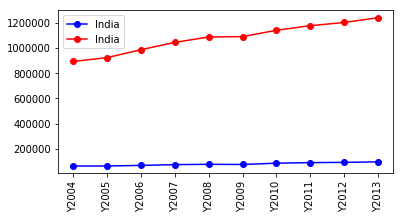

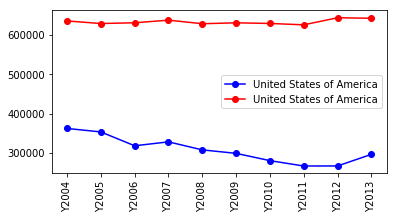

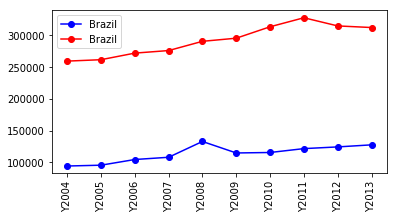

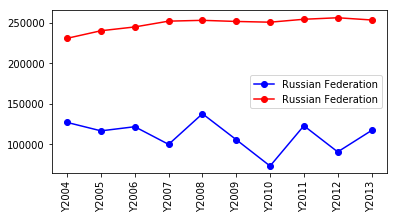

In [24]:
# to compare the feed of top 5 food producer
# plt.figure(figsize=(16,8))
for j in df_food_total.index:
    plt.figure(figsize=(6,3))
    plt.plot(df_feed[j], marker='o', color='b')
    plt.plot(df_food[j], marker='o', color='r')
    plt.xticks(df_feed.index, rotation='vertical')
    plt.legend(loc='best')
    plt.show()

## larget producer of a certain food
#### which food is produced more and by whom and who consumes that particular food more?
#### which food is consumed more and by whom and who produce it?

### Cleaning the data, removing all NaN values

In [25]:
df = df.dropna(axis=0, how='any')

In [26]:
# dropping the unnecessary Columns
df.drop(['Area Abbreviation', 'Area Code', 'Item Code', 'Element Code', 'Unit', 'latitude', 'longitude'], axis=1, inplace=True)

In [27]:
df.head()

,Area,Item,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Afghanistan,Wheat and products,Food,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,2053.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,Afghanistan,Rice (Milled Equivalent),Food,183.0,183.0,182.0,220.0,220.0,195.0,231.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,Afghanistan,Barley and products,Feed,76.0,76.0,76.0,76.0,76.0,75.0,71.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,Afghanistan,Barley and products,Food,237.0,237.0,237.0,238.0,238.0,237.0,225.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,Afghanistan,Maize and products,Feed,210.0,210.0,214.0,216.0,216.0,216.0,235.0,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [28]:
df_temp = df.set_index(['Element','Area','Item'])

In [29]:
df_temp.head()

Y1961   Y1962   Y1963   Y1964  \
Element Area        Item                                                       
Food    Afghanistan Wheat and products        1928.0  1904.0  1666.0  1950.0   
                    Rice (Milled Equivalent)   183.0   183.0   182.0   220.0   
Feed    Afghanistan Barley and products         76.0    76.0    76.0    76.0   
Food    Afghanistan Barley and products        237.0   237.0   237.0   238.0   
Feed    Afghanistan Maize and products         210.0   210.0   214.0   216.0   

                                               Y1965   Y1966   Y1967   Y1968  \
Element Area        Item                                                       
Food    Afghanistan Wheat and products        2001.0  1808.0  2053.0  2045.0   
                    Rice (Milled Equivalent)   220.0   195.0   231.0   235.0   
Feed    Afghanistan Barley and products         76.0    75.0    71.0    72.0   
Food    Afghanistan Barley and products        238.0   237.0   225.0   227.0   
Feed    Afghanistan Maize and products         216.0   216.0   235.0   232.0   

                                               Y1969   Y1970  ...     Y2004  \
Element Area        Item                                      ...             
Food    Afghanistan Wheat and products        2154.0  1819.0  ...    3249.0   
                    Rice (Milled Equivalent)   238.0   213.0  ...     419.0   
Feed    Afghanistan Barley and products         73.0    74.0  ...      58.0   
Food    Afghanistan Barley and products        230.0   234.0  ...     185.0   
Feed    Afghanistan Maize and products         236.0   200.0  ...     120.0   

                                               Y2005   Y2006   Y2007   Y2008  \
Element Area        Item                                                       
Food    Afghanistan Wheat and products        3486.0  3704.0  4164.0  4252.0   
                    Rice (Milled Equivalent)   445.0   546.0   455.0   490.0   
Feed    Afghanistan Barley and products        236.0   262.0   263.0   230.0   
Food    Afghanistan Barley and products         43.0    44.0    48.0    62.0   
Feed    Afghanistan Maize and products         208.0   233.0   249.0   247.0   

                                               Y2009   Y2010   Y2011  Y2012  \
Element Area        Item                                                      
Food    Afghanistan Wheat and products        4538.0  4605.0  4711.0   4810   
                    Rice (Milled Equivalent)   415.0   442.0   476.0    425   
Feed    Afghanistan Barley and products        379.0   315.0   203.0    367   
Food    Afghanistan Barley and products         55.0    60.0    72.0     78   
Feed    Afghanistan Maize and products         195.0   178.0   191.0    200   

                                              Y2013  
Element Area        Item                             
Food    Afghanistan Wheat and products         4895  
                    Rice (Milled Equivalent)    422  
Feed    Afghanistan Barley and products         360  
Food    Afghanistan Barley and products          89  
Feed    Afghanistan Maize and products          200  

[5 rows x 53 columns]

## Top 10 Highest produced food

In [30]:
food = df_temp.xs('Food', level=0)

In [31]:
df_item = (df.pivot_table(values =year_list, columns='Element',index=['Item'], aggfunc='sum')).T

In [32]:
df_top_food = df_item.xs('Food',level=1).sum(axis=0).sort_values(ascending=False).head(10)

In [33]:
df_top_food

Item
Milk - Excluding Butter     10246872.0
Cereals - Excluding Beer     9082257.0
Vegetables                   8216657.0
Vegetables, Other            6435872.0
Fruits - Excluding Wine      4561297.0
Wheat and products           3902810.0
Starchy Roots                3723792.0
Rice (Milled Equivalent)     3552834.0
Meat                         2534703.0
Alcoholic Beverages          2177747.0
dtype: float64

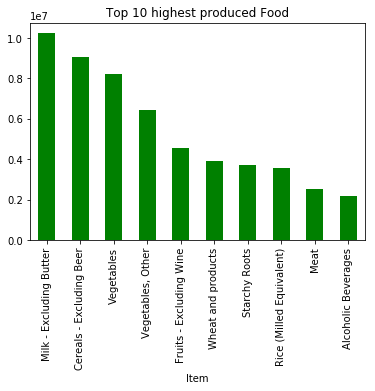

In [34]:
df_top_food.plot(kind='bar', title='Top 10 highest produced Food', color='green')

## Top 10 Food Consumed

In [35]:
feed = df_temp.xs('Feed', level=0)

In [36]:
df_top_feed = df_item.xs('Feed',level=1).sum(axis=0).sort_values(ascending=False).head(10)

In [37]:
df_top_feed

Item
Cereals - Excluding Beer    6989416.0
Maize and products          4494251.0
Starchy Roots               1402843.0
Milk - Excluding Butter     1071284.0
Wheat and products           893322.0
Cassava and products         752280.0
Barley and products          686746.0
Sweet potatoes               404187.0
Vegetables                   384063.0
Vegetables, Other            366443.0
dtype: float64

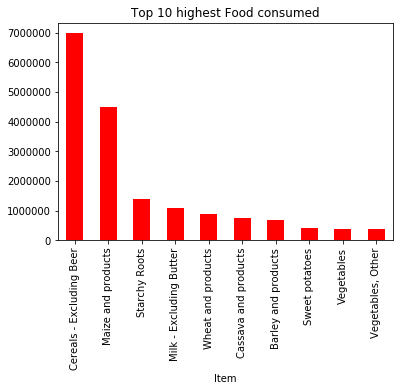

In [38]:
df_top_feed.plot(kind='bar', title='Top 10 highest Food consumed', color='red')

## Top 10 countries producing the top most Produced Food

In [39]:
# top most produced food
top_food = df_top_food.head(1).index[0]

In [40]:
top_food

'Milk - Excluding Butter'

In [41]:
top_food_producing_countries = df_temp.xs('Food',level=0).xs(top_food, level=1).sum(axis=1).sort_values(ascending=False).head(10)

In [42]:
top_food_producing_countries

Area
United States of America    3353075.0
United States of America    3353075.0
India                       2443021.0
India                       2443021.0
Germany                      918055.0
Germany                      918055.0
Pakistan                     762844.0
Pakistan                     762844.0
France                       756657.0
France                       756657.0
dtype: float64

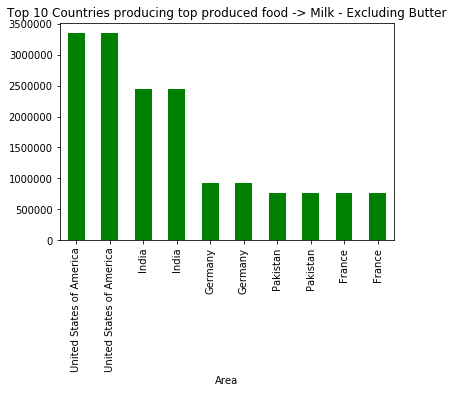

In [43]:
top_food_producing_countries.plot(kind='bar',title=f'Top 10 Countries producing top produced food -> {top_food}', color='green')

## Top 10 countries consuming the top most Produced Food

In [44]:
top_food_consuming_countries = df_temp.xs('Feed',level=0).xs(top_food, level=1).sum(axis=1).sort_values(ascending=False).head(10)

In [45]:
top_food_consuming_countries

Area
India          433698.0
India          433698.0
Germany        383297.0
Germany        383297.0
France         291865.0
France         291865.0
Poland         205037.0
Poland         205037.0
Netherlands    150389.0
Netherlands    150389.0
dtype: float64

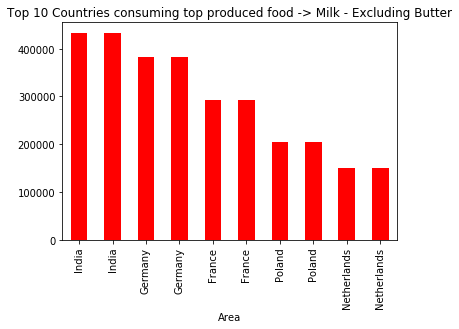

In [46]:
top_food_consuming_countries.plot(kind='bar',title=f'Top 10 Countries consuming top produced food -> {top_food}', color='red')

## Top 10 countries Producing the top most Consumed Food

In [47]:
# top most consumed food
top_feed = df_top_feed.head(1).index[0]

In [48]:
top_feed

'Cereals - Excluding Beer'

In [49]:
top_feed_producing_countries = df_temp.xs('Food',level=0).xs(top_feed, level=1).sum(axis=1).sort_values(ascending=False).head(10)

In [50]:
top_food_producing_countries

Area
United States of America    3353075.0
United States of America    3353075.0
India                       2443021.0
India                       2443021.0
Germany                      918055.0
Germany                      918055.0
Pakistan                     762844.0
Pakistan                     762844.0
France                       756657.0
France                       756657.0
dtype: float64

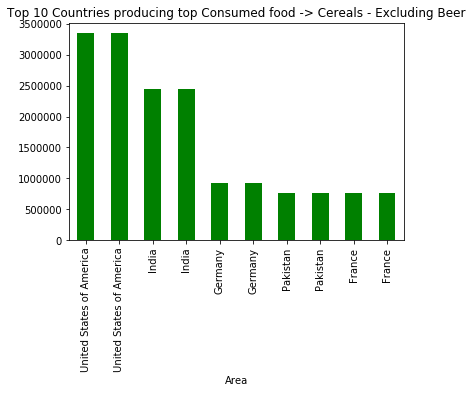

In [51]:
top_food_producing_countries.plot(kind='bar',title=f'Top 10 Countries producing top Consumed food -> {top_feed}', color='green')

## Top 10 countries Consuming the top most Consumed Food

In [52]:
top_feed_consuming_countries = df_temp.xs('Feed',level=0).xs(top_feed, level=1).sum(axis=1).sort_values(ascending=False).head(10)

In [53]:
top_feed_consuming_countries

Area
United States of America    7408504.0
China, mainland             4084713.0
Germany                     1195781.0
Brazil                      1080445.0
Canada                       985532.0
France                       961991.0
Poland                       799870.0
Japan                        762874.0
Spain                        760095.0
Italy                        609997.0
dtype: float64

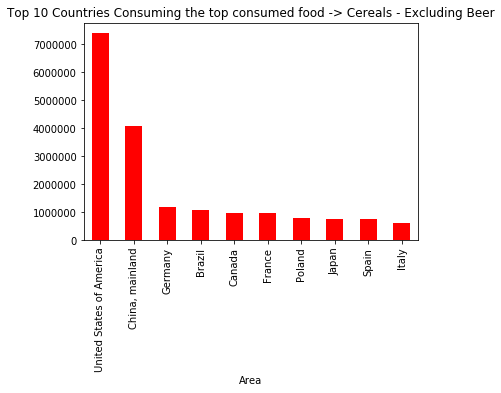

In [54]:
top_feed_consuming_countries.plot(kind='bar',title=f'Top 10 Countries Consuming the top consumed food -> {top_feed}', color='red')

### For India

In [55]:
df_india_food = df_temp.xs('Food',level=0).xs('India',level=0).sum(axis=1).sort_values(ascending=False).drop_duplicates().head(10)

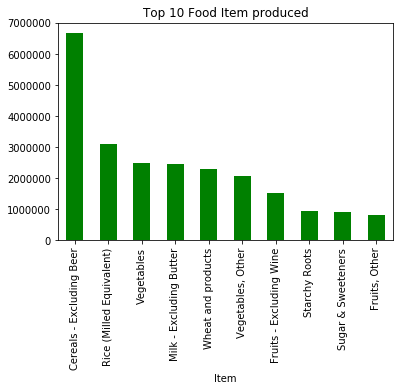

In [56]:
df_india_food.plot(kind='bar', title='Top 10 Food Item produced', color='green')

In [57]:
df_india_feed = df_temp.xs('Feed',level=0).xs('India',level=0).sum(axis=1).sort_values(ascending=False).drop_duplicates().head(10)

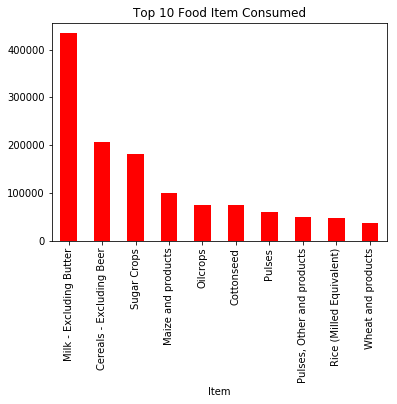

In [58]:
df_india_feed.plot(kind='bar', title='Top 10 Food Item Consumed',color='red')

## India Food vs Feed in last 10 years

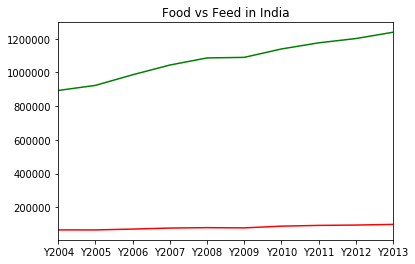

In [72]:
df_temp.xs('India', level=1).xs('Food', level=0).sum(axis=0).tail(10).plot(kind='line', color='green')
df_temp.xs('India', level=1).xs('Feed', level=0).sum(axis=0).tail(10).plot(kind='line',title='Food vs Feed in India', color='red')